In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


In [3]:
raw_df = pd.read_csv('../data/vehicle_data.csv')
raw_df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [6]:
raw_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [11]:
raw_df.corr(numeric_only=True)['selling_price'].sort_values(ascending=False)

selling_price    1.000000
year             0.413922
km_driven       -0.192289
Name: selling_price, dtype: float64

<Axes: xlabel='year', ylabel='selling_price'>

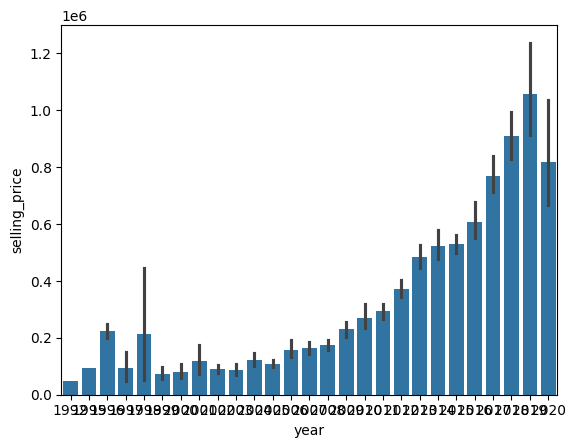

In [14]:
sns.barplot(data=raw_df, x='year', y='selling_price')

In [16]:
raw_df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [17]:
print("Unique values in categorical columns:")
for col in ['fuel', 'seller_type', 'transmission', 'owner']:
    print(f"{col}: {raw_df[col].unique()}")

Unique values in categorical columns:
fuel: ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
seller_type: ['Individual' 'Dealer' 'Trustmark Dealer']
transmission: ['Manual' 'Automatic']
owner: ['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


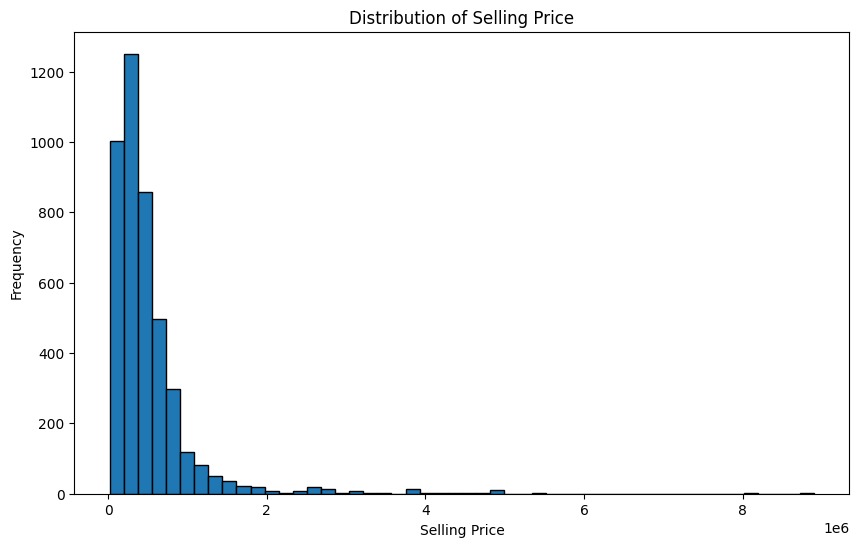

In [19]:
plt.figure(figsize=(10,6))
plt.hist(raw_df['selling_price'], bins=50, edgecolor='black')
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

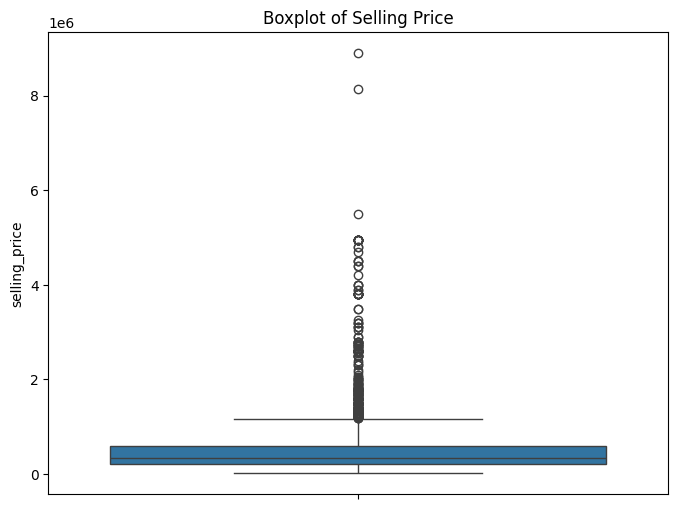

In [21]:
plt.figure(figsize=(8,6))
sns.boxplot(y=raw_df['selling_price'])
plt.title('Boxplot of Selling Price')
plt.show()

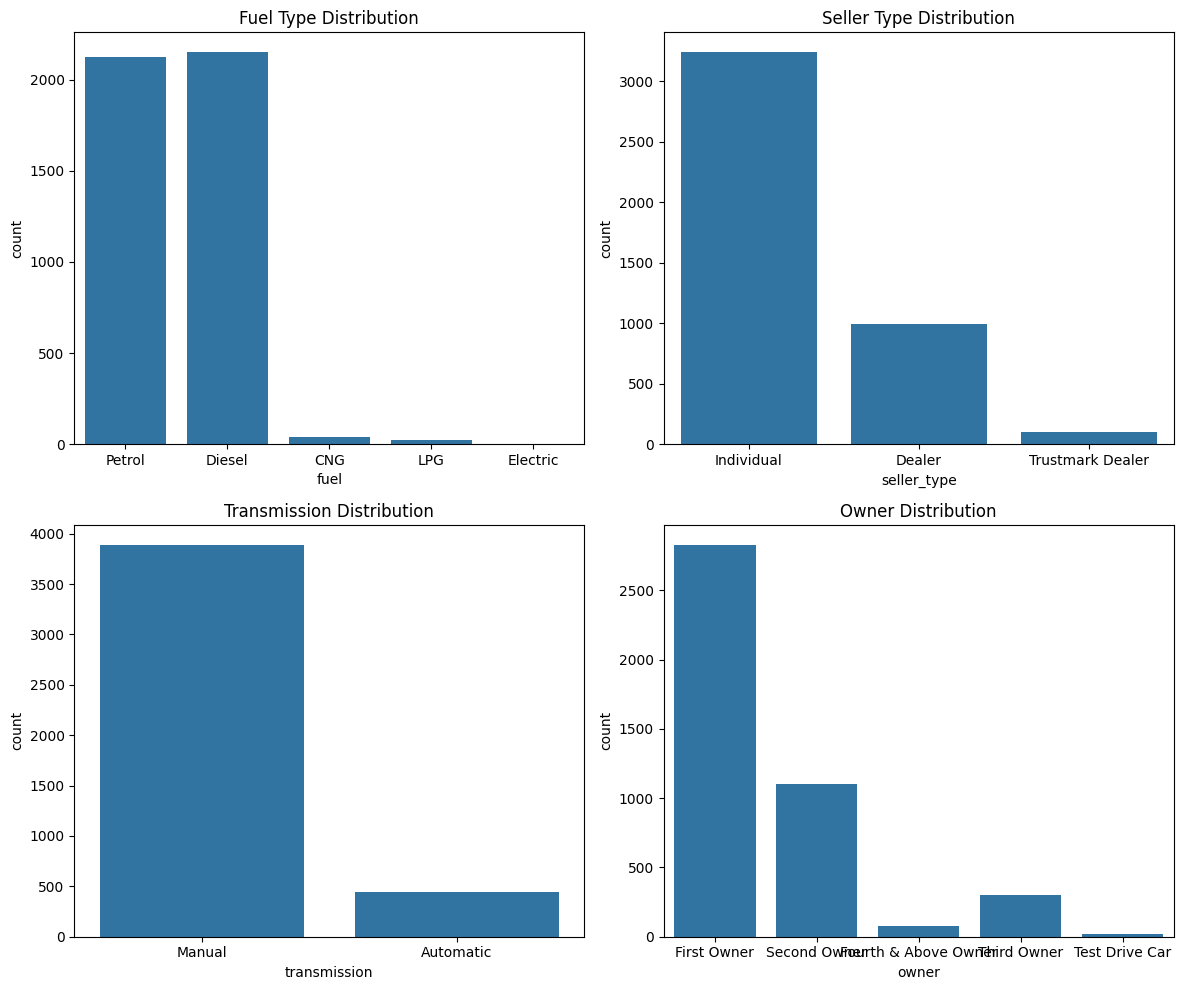

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.countplot(data=raw_df, x='fuel', ax=axes[0,0])
axes[0,0].set_title('Fuel Type Distribution')
sns.countplot(data=raw_df, x='seller_type', ax=axes[0,1])
axes[0,1].set_title('Seller Type Distribution')
sns.countplot(data=raw_df, x='transmission', ax=axes[1,0])
axes[1,0].set_title('Transmission Distribution')
sns.countplot(data=raw_df, x='owner', ax=axes[1,1])
axes[1,1].set_title('Owner Distribution')
plt.tight_layout()
plt.show()

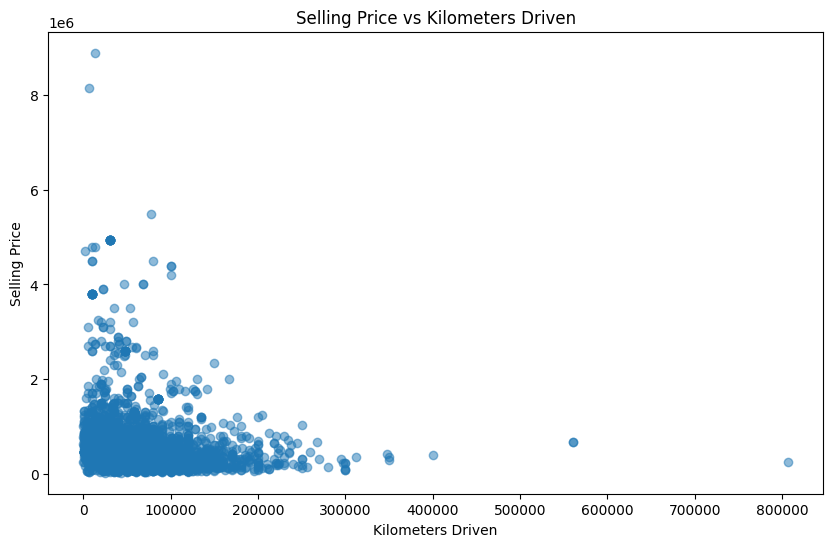

In [23]:
plt.figure(figsize=(10,6))
plt.scatter(raw_df['km_driven'], raw_df['selling_price'], alpha=0.5)
plt.title('Selling Price vs Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.show()

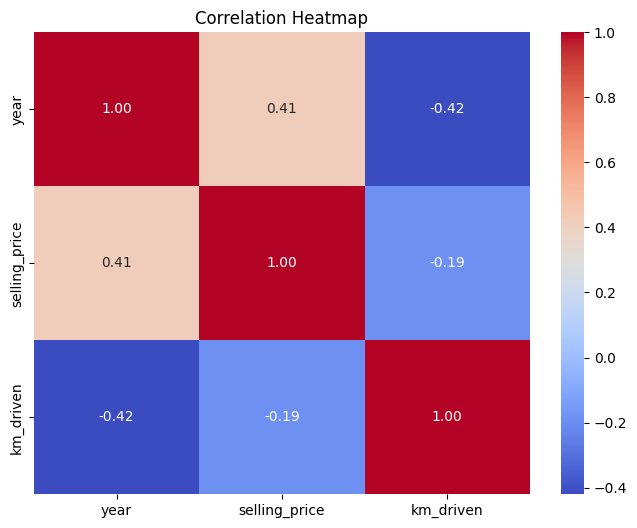

In [24]:
plt.figure(figsize=(8,6))
corr = raw_df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [26]:
print(f"Number of duplicate rows: {raw_df.duplicated().sum()}")

Number of duplicate rows: 763


In [27]:
print("Top 10 car names:")
print(raw_df['name'].value_counts().head(10))

Top 10 car names:
name
Maruti Swift Dzire VDI      69
Maruti Alto 800 LXI         59
Maruti Alto LXi             47
Hyundai EON Era Plus        35
Maruti Alto LX              35
Maruti Swift VDI BSIV       29
Maruti Wagon R VXI BS IV    29
Maruti Swift VDI            27
Maruti Wagon R LXI Minor    24
Hyundai EON Magna Plus      24
Name: count, dtype: int64


In [35]:
target = raw_df['selling_price']
featurs = raw_df.drop(columns=['selling_price'])

In [28]:
df = raw_df.copy().drop(columns=['selling_price'])

In [29]:
df.head(10)

,name,year,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,78000,CNG,Individual,Manual,First Owner


In [36]:
df.drop(columns=['name'], inplace=True)

In [37]:
df.isna().sum()

year            0
km_driven       0
fuel            0
seller_type     0
transmission    0
owner           0
dtype: int64

In [42]:
CURRENT_YEAR = df["year"].max()
df["car_age"] = CURRENT_YEAR - df["year"]
df.drop("year", axis=1, inplace=True)


In [47]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

In [48]:
numeric_cols

Index(['km_driven', 'car_age'], dtype='object')

In [44]:
categorical_cols = df.select_dtypes(include=['object']).columns

In [45]:
categorical_cols

Index(['fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   km_driven     4340 non-null   int64 
 1   fuel          4340 non-null   object
 2   seller_type   4340 non-null   object
 3   transmission  4340 non-null   object
 4   owner         4340 non-null   object
 5   car_age       4340 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 203.6+ KB
